## WOA Dissolved Oxygen: 
The total amount of dissolved oxygen in the ocean.

## WOA Apparent Oxygen Utilization: 
% oxygen satuation minus actual dissolved oxygen. 

## WOA Percent Oxygen Saturation: 
The actual amount of dissolved oxygen in the ocean vs maximum amount.

In [24]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 

In [25]:
woa18_o2 = xr.open_zarr('../data/woa18/woa_oxygen_dissolved_all',decode_times=False).dissolved
woa18_o2_sat = xr.open_zarr('../data/woa18/woa_oxygen_saturation_all',decode_times=False).oxygen_saturation
woa18_aou = xr.open_zarr('../data/woa18/woa_aou_all',decode_times=False).aou

In [26]:
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

In [27]:
#separating all the ocean basins
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) 
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2))
pacificocean = (woa18_basins.where(woa18_basins==3) / woa18_basins.where(woa18_basins==3))
arcticocean = (woa18_basins.where(woa18_basins==4) / woa18_basins.where(woa18_basins==4))
indianocean = (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==5))

Text(0.5, 1.0, 'Ocean Basin Mask')

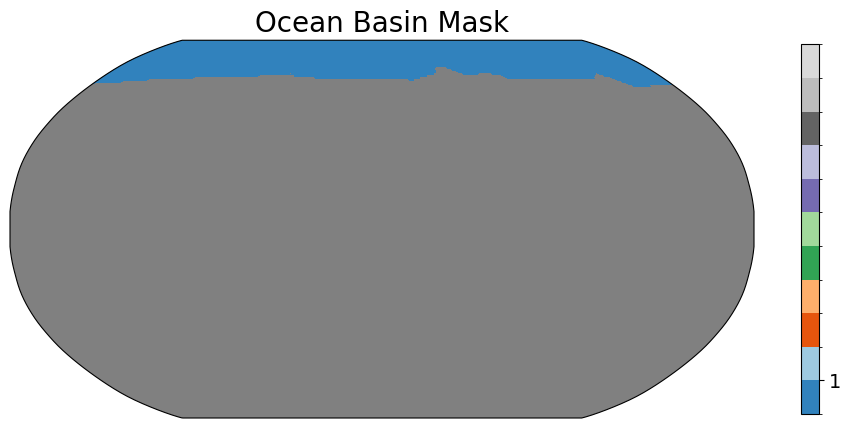

In [11]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = arcticocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [17]:
woa18_aou_arctic = woa18_aou*arcticocean
woa18_o2_arctic = woa18_o2*arcticocean
woa18_o2sat_arctic = woa18_o2_sat*arcticocean

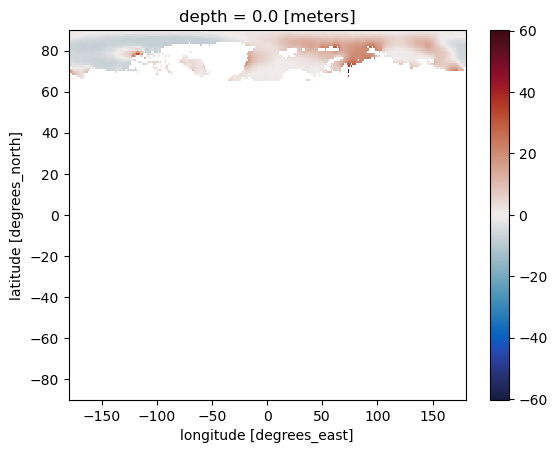

In [35]:
woa18_aou_arctic.isel(depth=0).plot(cmap=cmocean.cm.balance)

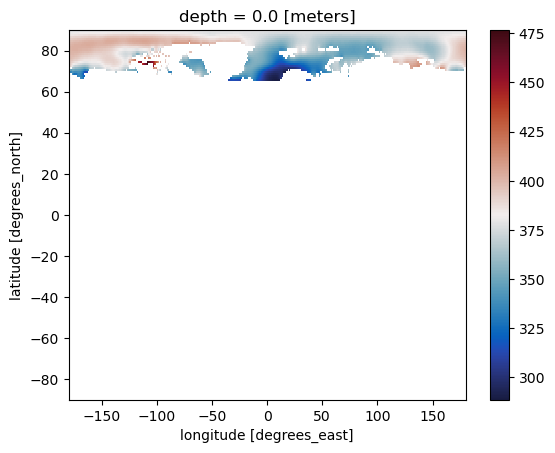

In [34]:
woa18_o2_arctic.isel(depth=0).plot(cmap=cmocean.cm.balance)

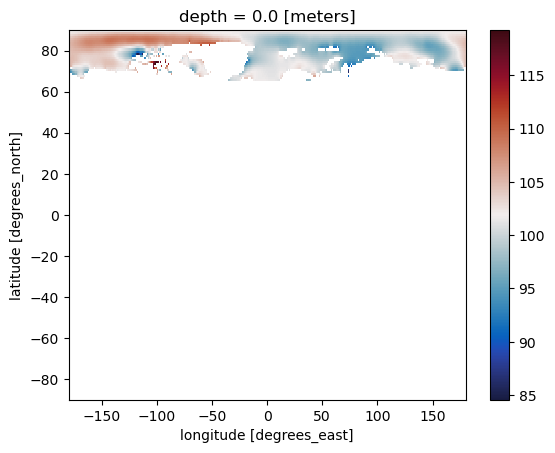

In [36]:
woa18_o2sat_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance)

Text(0.5, 1.0, 'WOA AOU [μmol/kg]')

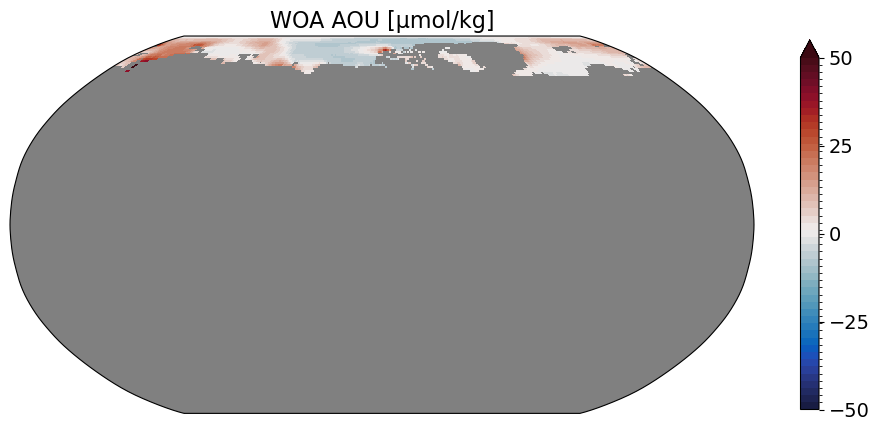

In [15]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_aou_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=-50, vmax=50, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 [μmol/kg]')

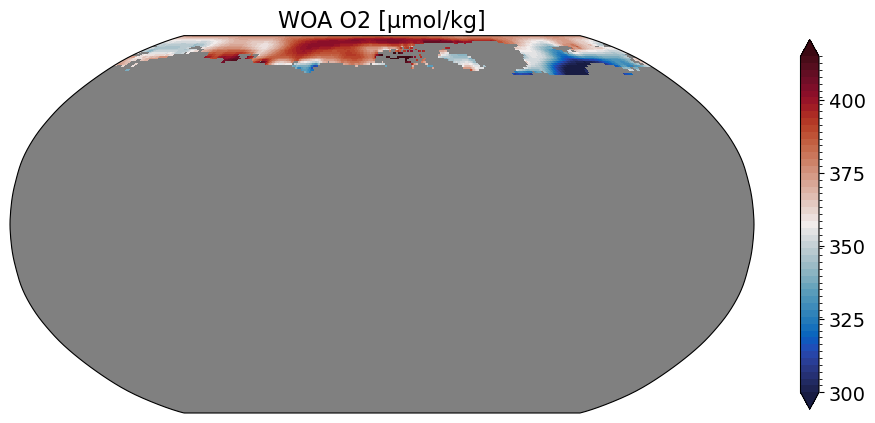

In [49]:
#arctic dissolved oxygen map
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_o2_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=300, vmax=415, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[300,325,350,375,400,425], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'WOA O2 Sat [μmol/kg]')

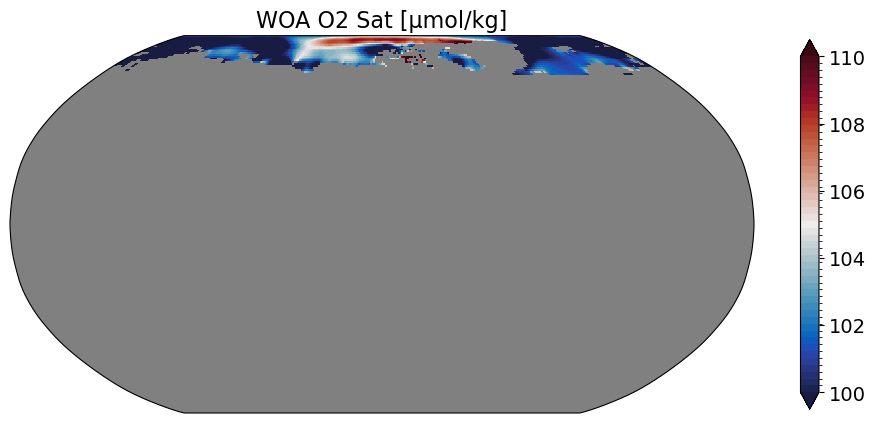

In [48]:
#arctic oxygen saturation map
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_o2sat_arctic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=100, vmax=110, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[100,102,104,106,108,110], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA O2 Sat [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'Ocean Basin Mask')

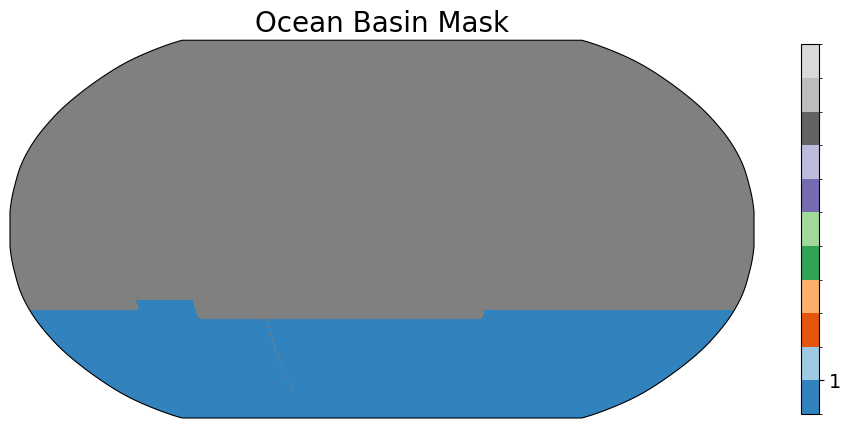

In [14]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = southernocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [21]:
woa18_aou_southernocean = woa18_aou*southernocean

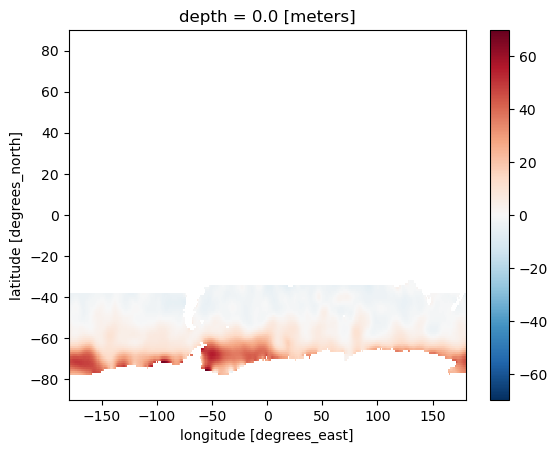

In [22]:
woa18_aou_southernocean.isel(depth=0).plot()